Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


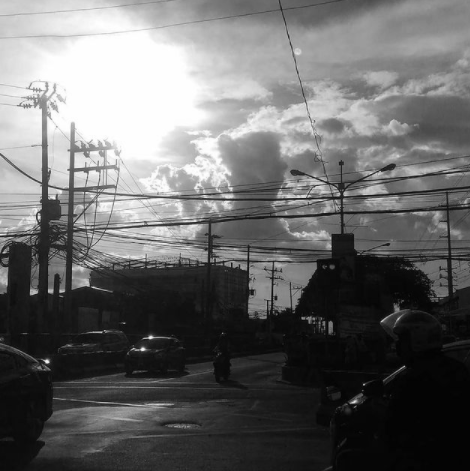

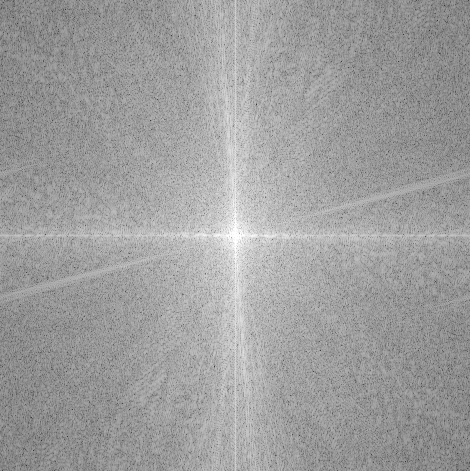

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log


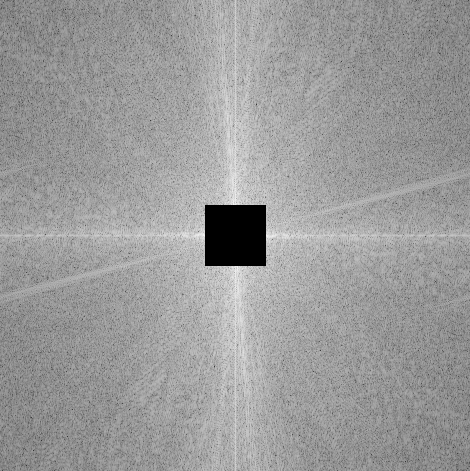

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


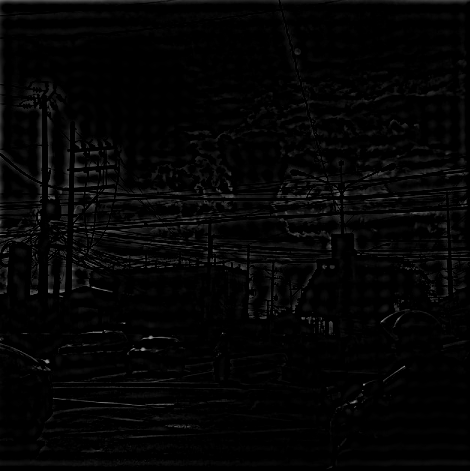

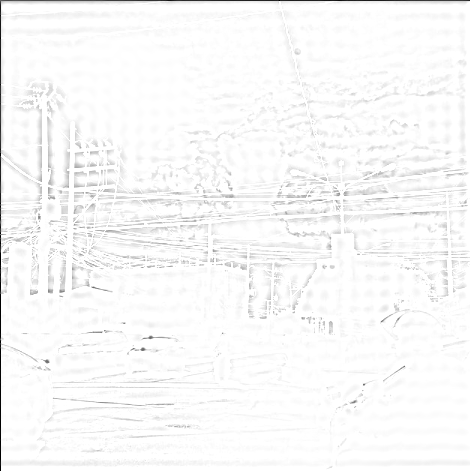

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: ComplexWarning: Casting complex values to real discards the imaginary part


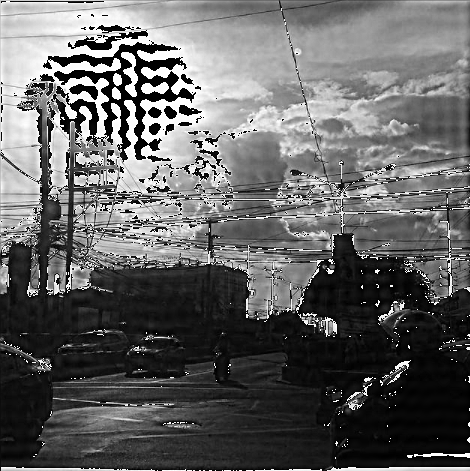

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from skimage import color, exposure, transform
from skimage.exposure import equalize_hist

drive.mount('/content/drive')

img_unp = cv2.imread('/content/image1.png', 0)
cv2_imshow(img_unp)
fft_img = np.fft.fftshift(np.fft.fft2(img_unp))
mag_spec = 20*np.log(np.abs(fft_img))
cv2_imshow(mag_spec)

fft_temp = fft_img

rows, cols = img_unp.shape
crow,ccol = rows//2 , cols//2
fft_img[crow-30:crow+31, ccol-30:ccol+31] = 0
mag_spec = 20*np.log(np.abs(fft_img))
cv2_imshow(mag_spec)

new_img = np.fft.ifft2(np.fft.ifftshift(fft_img))
cv2_imshow(new_img)
for i in range(1, rows):
    for j in range(1, cols):
      new_img[i,j] = 255 - new_img[i,j]

cv2_imshow(new_img)

for i in range(1, rows):
    for j in range(1, cols):
      img_unp[i,j] = img_unp[i,j] - new_img[i,j]

cv2_imshow(img_unp)



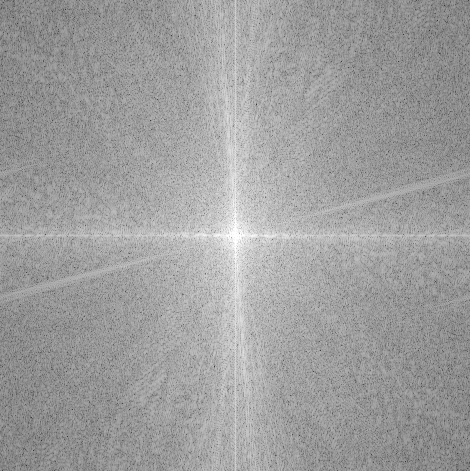

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log


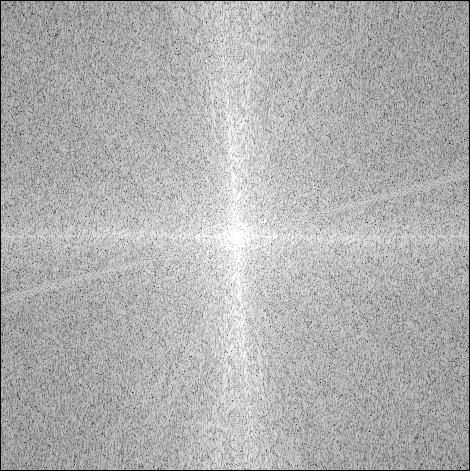

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


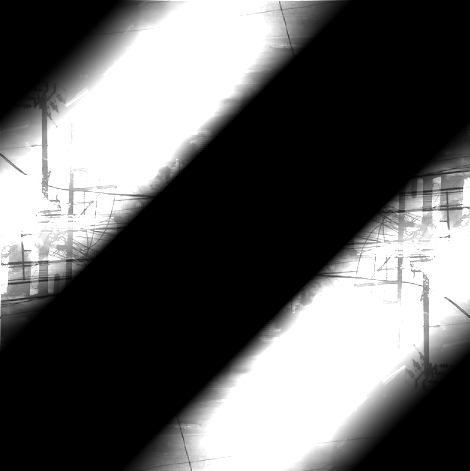

In [ ]:
img_unp = cv2.imread('/content/image1.png', 0)

fft_img = np.fft.fftshift(np.fft.fft2(img_unp))
mag_spec = 20*np.log(np.abs(fft_img))

cv2_imshow(mag_spec)


img_unp = fft_img
m, n = img_unp.shape
img = np.zeros([m+1, n+1])

for i in range(1, m+1):
    for j in range(1, n+1):
      if(i == 0 or j == 0 or i == m or j == n):
        img[i,j] = 0
      else:
        img[i,j] = img_unp[i-1,j-1]

mask = np.array([[0,1,0],[1,-4,1],[0,1,0]])
img_new = np.zeros([m, n])

for i in range(1, m-1):
    for j in range(1, n-1):
        temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2]
         
        img_new[i, j]= temp
#img_new = img_new.astype(np.uint8)
mag_spec = 20*np.log(np.abs(img_new))

new_img = np.fft.ifft2(np.fft.ifftshift(img_new))
cv2_imshow(mag_spec)
cv2_imshow(new_img)
